In [4]:
import math
import matplotlib.pyplot as plt

#Variaveis constantes
Te = 1.0e7                    # em anos
pi = math.pi
H0 = 7.2e-11                  # em anos decrescentes
G = 66450                     # Constante gravitacional em m^3 / kg / yr^2
Em = 2.53e-27                 # Densidade da matéria em kg / m^3
Er = 5.6e-31                  # Densidade da radiação em kg / m^3
El = 6.78e-27                 # Densidade Lambda em kg / m^3


In [5]:
def getE(a, mat, rad, lamb):
    tm = mat / (a**2)
    tr = 2.0*rad/(a**3)   
    tl = -2.0*lamb/(a**-1.0)
    return tm + tr + tl

In [6]:
# Run simulation backward from present day until scale factor is < 0.01
def expansionSim(Em, Er, El, cor, title):
    To = 0.0
    a0 = 1.0
    He = H0
    
    while a0 > 0.01:
        He -= Te*-4.0/3.0*pi*G*getE(a0, Em, Er, El)
        a0 -= Te*He
        To -= Te
        plt.scatter(-a0, -To/1.0e9, marker=".", color=cor)
    pass

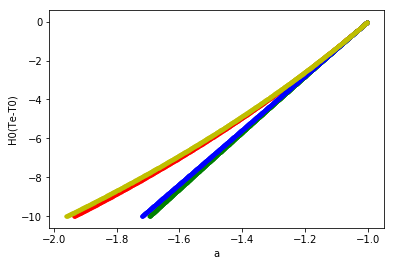

In [7]:
expansionSim(Em, Er, El, 'r',"Benchmark")
expansionSim(Em, 0, 0, 'g', "Matter")
expansionSim(0, Er, 0, 'b', "Radiation")
expansionSim(0, 0, El, 'y',"Lambda")

plt.xlabel("a")
plt.ylabel("H0(Te-T0)")
plt.show()